To create an instance of a coupled model (``cde``) with $Q \propto \rho_c$, use:

In [1]:
from EPIC.cosmology import cosmic_objects as cosmo

CDE = cosmo.CosmologicalSetup(
    'cde',
    interaction_setup={
        'species': ['idm', 'ide'],
        'parameter': {'idm': 'xi'},
        'propto_other': {'ide': 'idm'},
        'sign': {'idm':1, 'ide':-1},
    },
    physical=False,
    derived='ide'
)

The mandatory species are ``idm`` and ``ide``. You can add ``baryons`` in the ``optional_species`` list keyword argument, but note that ``matter`` is not available as a combined species for this model type since dark matter is interacting with another fluid while baryons are not.
What is new here is the ``interaction_setup`` dictionary. This is where we tell the code which ``species`` are interacting (at the moment only an energy exchange within a pair is supported), to which of them (``idm``) we associate the interaction ``parameter`` ``xi``, indicate the second one (``ide``) as having an interaction term proportional to the other (``idm``) and specify the sign of the interaction term for each fluid, in this case that means $Q_c = 3 H \xi \rho_c$ and $Q_d = - 3 H \xi \rho_c$.

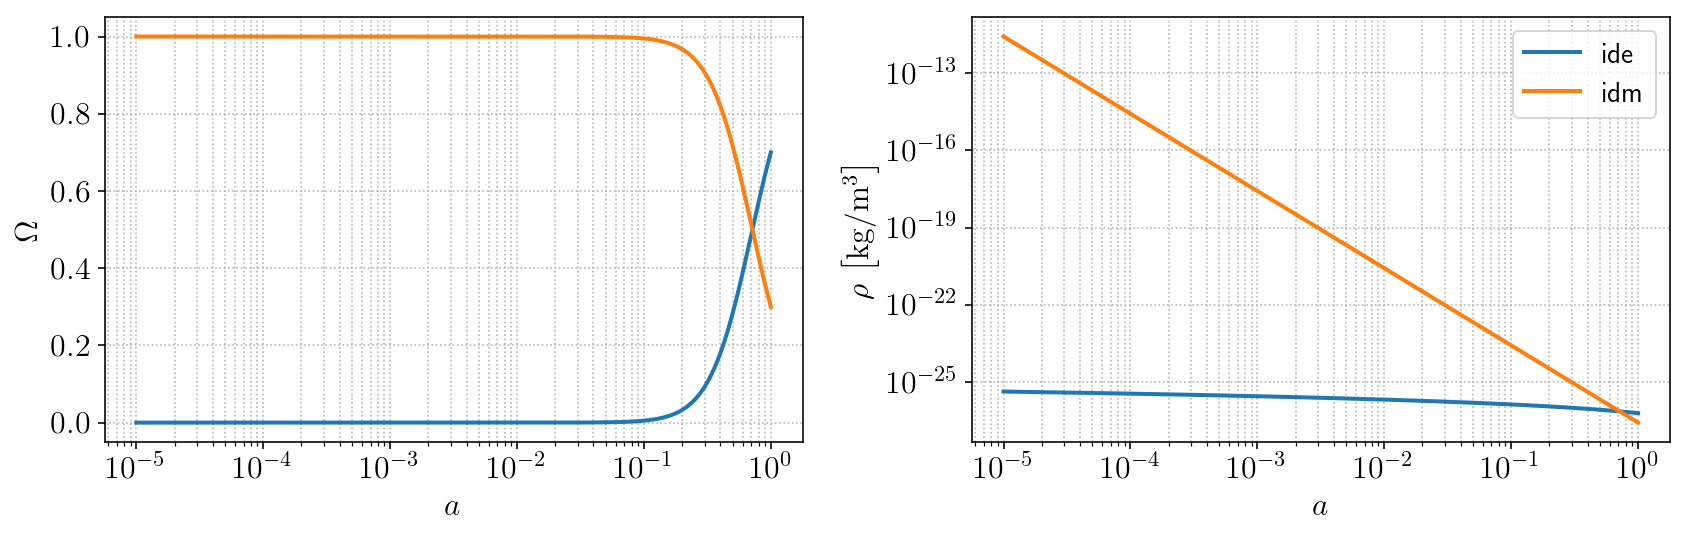

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = 16
plt.rcParams['figure.dpi'] = 144

def show_densities(model, **kwargs):
    from EPIC.cosmology import rho_critical_SI
    hubble = model.HubbleParameter.get_value(**kwargs)
    rho_cr0 = rho_critical_SI(
        hubble * (100 if model.physical_density_parameters else 1)
    )
    fig, ax = plt.subplots(1, 2)
    fig.set_size_inches(12, 4)
    for key in model.background_solution_Omegas.keys():
        ax[0].plot(model.a_range, model.background_solution_Omegas[key], lw=2, label=key)
        ax[1].plot(model.a_range, rho_cr0 \
                   * (hubble**-2 if model.physical_density_parameters else 1) \
                   * model.background_solution_rhos[key], lw=2, label=key)
    ax[0].set_xscale('log')
    ax[0].set_ylabel(r'$\Omega$')
    ax[0].set_xlabel(r'$a$')
    ax[0].grid(which='both', linestyle=':')
    #ax[0].legend()
    ax[1].set_xscale('log')
    ax[1].set_yscale('log')
    ax[1].set_ylabel(r'$\rho \, \left[ \rm{kg}/\rm{m}^3 \right]$')
    ax[1].set_xlabel(r'$a$')
    ax[1].grid(which='both', linestyle=':')    
    ax[1].legend(fontsize=14)
    fig.tight_layout()
    
parameters = {'Oc0': 0.3, 'H0': 68, 'xi': 0.4, 'wd': -1}
CDE.solve_background(parameter_space=parameters)
show_densities(CDE, parameter_space=parameters)

Here, I am exaggerating the value of the interaction parameter so we can see a variation on the dark energy density that is due to the interaction, not the equation-of-state parameter, which is $-1$.
This same cosmology can be realized with the model type ``cde_lambda`` without specifying the parameter ``wd``, since the ``ilambda`` fluid has fixed $w_d = -1$.
The dark matter interacting term $Q_c$ is positive with $\xi$ positive, thus the lowering of the dark energy density as its energy flows from dark energy to dark matter.